## Installing Dependencies

In [1]:
# Install Neural Prophet
!pip install neuralprophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.1/185.1 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Data Preprocessing
- Keeping only the Date and AQI columns

In [2]:
df = pd.read_csv('/content/Karimnagar22.csv')

df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)
df.info()

df2 = pd.read_csv('/content/karimnagar_101.csv')
df2.drop_duplicates(subset=['date'], inplace=True)
df2.info()

df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)

df2 = df2[['date','max_temp']]
df2.drop_duplicates(subset=['date'], inplace=True)

df2.info()

df2['date'] = df2['date'].str.replace('(2018|2019|2020|2021)', '2021')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      336 non-null    object 
 1   max_temp  336 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     365 non-null    int64  
 1   date           365 non-null    object 
 2   location       365 non-null    object 
 3   min_temp       365 non-null    float64
 4   max_temp       365 non-null    float64
 5   min_humidity   365 non-null    float64
 6   max_humidity   365 non-null    float64
 7   min_windspeed  365 non-null    float64
 8   max_windspeed  365 non-null    float64
 9   rain           365 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3

<ipython-input-2-457e639469e1>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['date'] = df2['date'].str.replace('(2018|2019|2020|2021)', '2021')


In [3]:
df = pd.concat([df2, df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      701 non-null    object 
 1   max_temp  701 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [4]:
# Data Preprocessing
df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
#df=df.rename(columns={'AQI':'y'}) # Target must be y
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 700
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      701 non-null    datetime64[ns]
 1   y       701 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.4 KB


## Normalising the data - MinMax Scaling

In [5]:
# Data normalisation - Change the AQI into 0-1 MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
values = df['y'].values.reshape(-1, 1)
# fit the scaler to the data and transform it
scaled_values = scaler.fit_transform(values)
# assign the transformed data to the original column
df['y'] = scaled_values 

In [6]:
# Save the scaler values for forecast later
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

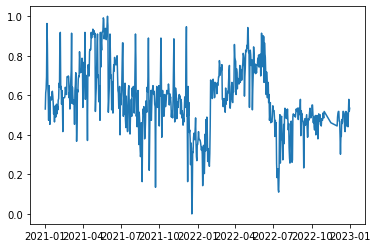

In [7]:
plt.plot(df['ds'], df['y'])
plt.show()

In [8]:
df

,ds,y
0,2021-01-01,0.530612
1,2021-01-02,0.612245
2,2021-01-03,0.632653
3,2021-01-04,0.693878
4,2021-01-05,0.963265
...,...,...
696,2022-12-27,0.440816
697,2022-12-28,0.518367
698,2022-12-29,0.579592
699,2022-12-30,0.518367


In [9]:
#define the model and parameters
from neuralprophet import NeuralProphet
m = NeuralProphet(
    n_changepoints=100,
    trend_reg=4,
    yearly_seasonality=4,
    weekly_seasonality=False,
    daily_seasonality=False,

)
#metrics = m.fit(df, freq="D")
#forecast = m.predict(df)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.572% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.572% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.844% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.844% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is e

Finding best initial lr:   0%|          | 0/221 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

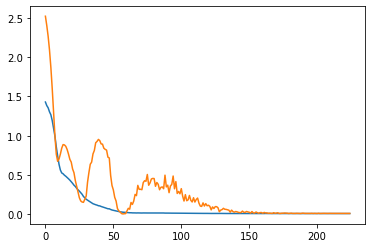

In [10]:
# Train-Test Split and,Train the model
df_train, df_test = m.split_df(df, freq="D", valid_p=1.0 / 12)
metrics = m.fit(df_train, freq="D", validation_df=df_test, progress="plot")

In [11]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
224,0.112864,0.132479,0.010688,0.0,224,0.112874,0.144117,0.008906,0.0


In [12]:
# import torch

# # ...

# # Save the model to a file
# torch.save(m.model.state_dict(), 'model.pth')

In [13]:
# model = NeuralProphet(
#     n_changepoints=100,
#     trend_reg=2,
#     yearly_seasonality=3,
#     weekly_seasonality=3,
#     daily_seasonality=False
# )
# torch.load('model.pth')
# model.model.load_state_dict(torch.load('model.pth'))

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.844% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.844% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.844% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.844% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 41it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


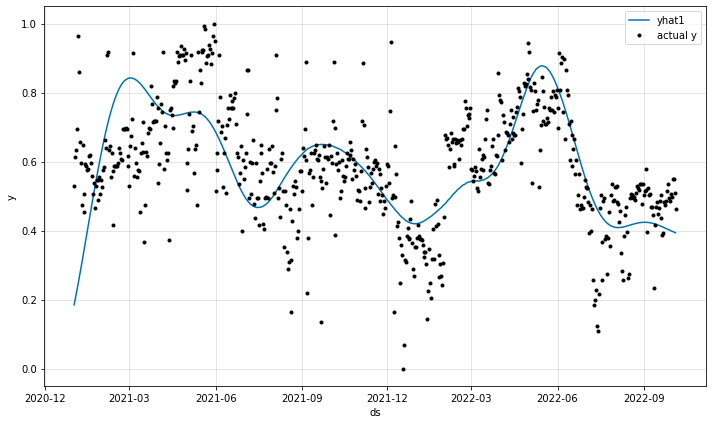

In [14]:
forecast_train = m.predict(df_train)
fig = m.plot(forecast_train)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.828% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.828% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.828% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.828% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 41it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


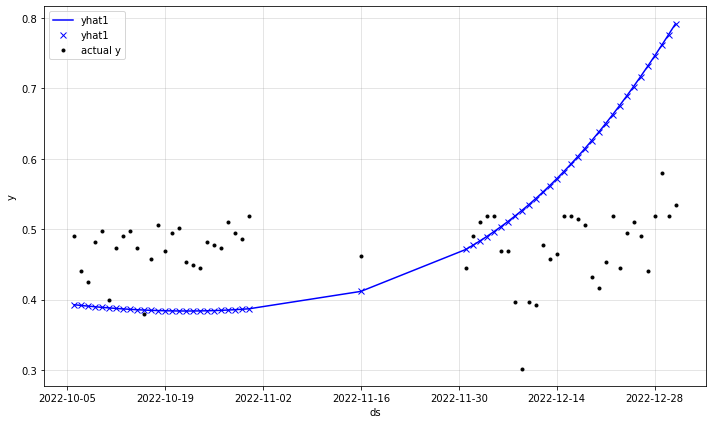

In [15]:
forecast_test = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast_test[-7 * 24 :])

In [16]:
df_test
t1_actual = scaler.inverse_transform([df_test['y']])
print(t1_actual)

[[32.2 31.  30.6 32.  32.4 30.  31.8 32.2 32.4 31.8 29.5 31.4 32.6 31.7
  32.3 32.5 31.3 31.2 31.1 32.  31.9 31.8 32.7 32.3 32.1 32.9 31.5 31.1
  32.2 32.7 32.9 32.9 31.7 31.7 29.9 27.6 29.9 29.8 31.9 31.4 31.6 32.9
  32.9 32.8 32.6 30.8 30.4 31.3 32.9 31.1 32.3 32.7 32.2 31.  32.9 34.4
  32.9 33.3]]


In [17]:
#forecast
t1_pred= scaler.inverse_transform([forecast_test['yhat1']])
print(t1_pred)

[[29.82023844 29.79562996 29.77220361 29.75003823 29.72920686 29.70977373
  29.69179946 29.67533588 29.66043703 29.64714452 29.63550436 29.62555159
  29.61732565 29.61085134 29.60616082 29.60328108 29.60223549 29.603054
  29.60575412 29.61036579 29.61691676 29.62542601 29.63592128 29.6484442
  29.66302398 29.67970003 30.28496359 31.74299419 31.88628018 32.03652748
  32.19393763 32.35870848 32.5310445  32.71111871 32.89911659 33.09520022
  33.29952441 33.51224102 33.73347126 33.96333779 34.20194284 34.44936819
  34.70568539 34.97094263 35.24516619 35.52837799 35.82055612 36.12167866
  36.43169014 36.75051315 37.07804839 37.41418196 37.75876052 38.11161907
  38.47256191 38.84137146 39.21781115 39.60160644]]


In [18]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(t1_actual, t1_pred) #transformed values

0.08707656014387051

In [19]:
mean_absolute_percentage_error(df_test['y'], forecast_test['yhat1'])

0.24165593340594219

In [20]:
print(len(t1_actual[0]), len(t1_pred[0]))

58 58


In [21]:
# Compare the predicted value vs actual value
data = {'actual': t1_actual[0], 'prediction': t1_pred[0]}
# create a DataFrame from the dictionary
df1 = pd.DataFrame(data)

In [22]:
df = pd.read_csv('/content/Karimnagar22.csv')
df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)

df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
#df=df.rename(columns={'AQI':'y'}) # Target must be y
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      336 non-null    datetime64[ns]
 1   y       336 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


In [23]:
import pickle
pkl_path = "/content/model.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)



In [24]:
# Forecast for more days
future = m.make_future_dataframe(df, periods=1500)
forecast_more_years = m.predict(future)
forecast_more_years

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.107% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.107% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 41it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.807856,0.942145,-0.134289
1,2023-01-02,None,0.824086,0.943982,-0.119896
2,2023-01-03,None,0.840578,0.945819,-0.105241
3,2023-01-04,None,0.857318,0.947656,-0.090338
4,2023-01-05,None,0.874290,0.949493,-0.075203
...,...,...,...,...,...
1495,2027-02-04,None,4.074424,3.688270,0.386154
1496,2027-02-05,None,4.088281,3.690107,0.398175
1497,2027-02-06,None,4.101713,3.691943,0.409770
1498,2027-02-07,None,4.114707,3.693780,0.420926


In [25]:
# Save forecast
# save the dataframe
forecast_more_years.to_pickle("/content/forecast.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [26]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("/content/forecast.pkl")

In [27]:
fcast

,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.807856,0.942145,-0.134289
1,2023-01-02,None,0.824086,0.943982,-0.119896
2,2023-01-03,None,0.840578,0.945819,-0.105241
3,2023-01-04,None,0.857318,0.947656,-0.090338
4,2023-01-05,None,0.874290,0.949493,-0.075203
...,...,...,...,...,...
1495,2027-02-04,None,4.074424,3.688270,0.386154
1496,2027-02-05,None,4.088281,3.690107,0.398175
1497,2027-02-06,None,4.101713,3.691943,0.409770
1498,2027-02-07,None,4.114707,3.693780,0.420926


In [28]:
extract_ds=forecast_more_years['ds']
df_extract_ds=pd.DataFrame(extract_ds)
df_extract_ds

,ds
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
1495,2027-02-04
1496,2027-02-05
1497,2027-02-06
1498,2027-02-07


In [29]:
#forecast
final_forecast= scaler.inverse_transform([forecast_more_years['yhat1']])
print(final_forecast)

[[ 39.99247695  40.39011164  40.79416586 ... 120.69197292 121.01030965
  121.31758304]]


In [30]:
df = pd.DataFrame(final_forecast[0],)
df

,0
0,39.992477
1,40.390112
2,40.794166
3,41.204289
4,41.620103
...,...
1495,120.023395
1496,120.362888
1497,120.691973
1498,121.010310


In [31]:
merged_df = pd.concat([df_extract_ds,df], axis=1)
merged_df

,ds,0
0,2023-01-01,39.992477
1,2023-01-02,40.390112
2,2023-01-03,40.794166
3,2023-01-04,41.204289
4,2023-01-05,41.620103
...,...,...
1495,2027-02-04,120.023395
1496,2027-02-05,120.362888
1497,2027-02-06,120.691973
1498,2027-02-07,121.010310


In [33]:
merged_df.to_csv('/content/KarimnagarMaxTpredict.csv')